<a href="https://colab.research.google.com/github/shruti3000/Loan-Prediction/blob/main/LoanPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Prediction**

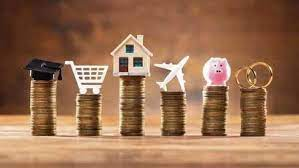

### Importing required library(as per need)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import sys
!{sys.executable} -m pip install xgboost
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

### Loading and Reading the Dataset

In [ ]:
loan_data = pd.read_csv("/content/Loan_dataset.csv")

In [ ]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_data.shape

(614, 13)

it conatins 615 rows and 13 columns.<br/>
The most important columns are:<br/>
-- Loan Amount,<br/>
-- Loan Amount term,<br/>
-- and Loan status (Yes or no).<br/>

loan_data['Loan Status']=Y(if applicant is eligible for loan)<br/>
loan_data['Loan Status']=N(if applicant is not eligible for loan)<br/>

In [ ]:
loan_data.info()
# to understand the datatypes of the columns and match with general understanding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# EDA

 ### Data Cleaning and filling missing values in the Dataset 

In [ ]:
# checking missing values in each column of train dataset
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
loan_data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
loan_data['Gender'] = loan_data.Gender.fillna('Male')

In [ ]:
loan_data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [ ]:
loan_data['Married'] = loan_data['Married'].fillna('Yes')

In [ ]:
loan_data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
loan_data['Dependents'] = loan_data['Dependents'].fillna('0')

In [ ]:
loan_data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
loan_data['Self_Employed'] = loan_data['Self_Employed'].fillna('No')

In [ ]:
loan_data.LoanAmount = loan_data['LoanAmount'].fillna(loan_data.LoanAmount.mean())

In [ ]:
loan_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].fillna(360.0)

In [ ]:
loan_data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
loan_data['Credit_History'] = loan_data['Credit_History'].fillna(1.0)

### Now again checking if there are still any columns that contain missing value

In [ ]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
loan_data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [ ]:
loan_data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [ ]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


### <b> Percentage of Not-Eligible and Eligible Applicants

In [ ]:
nfcount=0
notApp=loan_data['Loan_Status']
for i in range(len(notApp)):
  if notApp[i]=="N":
    nfcount=nfcount+1

nfcount    
per_nf=(nfcount/len(notApp))*100
print('percentage of total not eligible in the dataset: ',per_nf)
print('Percentage of total (eligible) Candidates in the training Dataset: ',100-per_nf)

percentage of total not eligible in the dataset:  31.27035830618892
Percentage of total (eligible) Candidates in the training Dataset:  68.72964169381108


### Now since we are done with doing with doing Exploratory Data Analysis and Data Cleaning
Now we will move to Training the model on our Dataset

### <b>Split the dataset<br>

In [ ]:
loan_data['Gender'].replace({'Male':1, 'Female':0},inplace=True)
loan_data['Married'].replace({'Yes':1, 'No':0},inplace=True)
loan_data['Dependents'].replace({'1':1, '0':0,'2':2,'3+':3},inplace=True)
loan_data['Education'].replace({'Graduate':1, 'Not Graduate':0},inplace=True)
loan_data['Self_Employed'].replace({'Yes':1, 'No':0},inplace=True)
loan_data['Property_Area'].replace({'Rural':1, 'Urban':0,'Semiurban':2},inplace=True)
loan_data['Loan_Status'].replace({'Y':1, 'N':0},inplace=True)
ld = loan_data.drop(columns=["Loan_ID"])

In [ ]:
x=ld.drop(columns=["Loan_Status"])
y=ld['Loan_Status']

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 1/3, random_state = 0)

# Classification Algorithms

## Logistic Regression

In [ ]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 0)
LR.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predicting the Test set results
ypred = LR.predict(xtest)

In [ ]:
ypred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1])

In [ ]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(ypred, ytest))
print('The F1 of Logistic Regression is: {0:0.4f}'. format(f1_score(ytest, ypred)))
print('The Precision Score of Logistic Regression is: {0:0.4f}'. format(precision_score(ytest, ypred)))
print('The Recall Score of Logistic Regression is: {0:0.4f}'. format(recall_score(ytest, ypred)))

The accuracy of Logistic Regression is:  0.8292682926829268
The F1 of Logistic Regression is: 0.8916
The Precision Score of Logistic Regression is: 0.8090
The Recall Score of Logistic Regression is: 0.9931


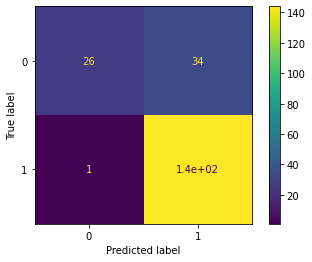

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(LR, xtest, ytest)  
plt.show() 

In [ ]:
cm

array([[  0,  60],
       [  0, 145]])

## Random Forest Classification

## Decision Tree Classification

In [ ]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTC.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
# Predicting the Test set results
ypred = DTC.predict(xtest)
ypred

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1])

In [ ]:
# Measuring Accuracy
print('The accuracy of Decision Tree Classifier is: ', metrics.accuracy_score(ypred, ytest))
print('The F1 of Decision Tree Classifier is: {0:0.4f}'. format(f1_score(ytest, ypred)))
print('The Precision Score of Decision Tree Classifier is: {0:0.4f}'. format(precision_score(ytest, ypred)))
print('The Recall Score of Decision Tree Classifier is: {0:0.4f}'. format(recall_score(ytest, ypred)))

The accuracy of Decision Tree Classifier is:  0.7268292682926829
The F1 of Decision Tree Classifier is: 0.8082
The Precision Score of Decision Tree Classifier is: 0.8027
The Recall Score of Decision Tree Classifier is: 0.8138


[[ 31  29]
 [ 27 118]]


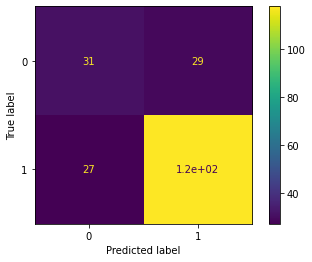

In [ ]:
# Making confusion matrix
print(confusion_matrix(ytest, ypred))
plot_confusion_matrix(DTC, xtest, ytest)  
plt.show() 

In [ ]:
# from sklearn.model_selection import GridSearchCV


In [ ]:
from xgboost import XGBClassifier
# parameters = {'alpha': (0.1, 10), 'max_depth': (5, 10), 'learning_rate': (0.1, 1)}
XGB = XGBClassifier()
XGB.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
ypred = XGB.predict(xtest)
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(ytest, ypred)))
print('XGBoost model F1 score: {0:0.4f}'. format(f1_score(ytest, ypred)))
print('XGBoost model precision score: {0:0.4f}'. format(precision_score(ytest, ypred)))
print('XGBoost model recall score: {0:0.4f}'. format(recall_score(ytest, ypred)))

XGBoost model accuracy score: 0.8049
XGBoost model F1 score: 0.8742
XGBoost model precision score: 0.8035
XGBoost model recall score: 0.9586


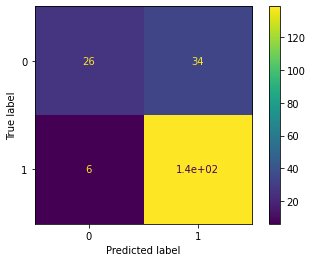

In [ ]:
plot_confusion_matrix(XGB, xtest, ytest)  
plt.show() 

# Result:

The accuracy of Logistic Regression is:  82.92 %

The accuracy of XGBoost Model is: 72.68 %

The accuracy of Decision Tree Classifier is: 80.49 %

From the above models and their respective results, the accuracies reflect that the best model among these is Logistic Regression and is to be preferred over the other two models.

Other interesting fact is that the accuracies of Logistic Regression and XGBoost Model are quite comparable.